In [1]:
import pandas as pd
import numpy as np
import os
os.getcwd()

'C:\\Users\\20182591\\TuE\\JBG060\\research'

In [2]:
def calculate_cm_to_m3(pump):
    inflow_df = pd.read_csv(f"../processed/pump_in_flow_appr_{pump}.csv")
    inflow_df['in_minus_out'] = abs(inflow_df['flow_in'] - inflow_df['hstWaarde'])
    inflow_df['level'] = inflow_df.iloc[:,1].round()
    inflow_df['prev_level'] = inflow_df['level'].shift(1)

    min_max_df = inflow_df.copy()
    min_max_df['zscore'] = abs((min_max_df['level'] - min_max_df['level'].mean())/min_max_df['level'].std(ddof=0))
    min_max_df = min_max_df[min_max_df['zscore'] < 1.5]
    max_level = min_max_df['level'].max()
    min_level = min_max_df['level'].min()
    small_df = inflow_df.loc[(inflow_df['level'] < max_level) & (inflow_df['level'] > min_level)]
    indexes = np.array(small_df['level'].min() + np.arange(small_df['level'].max() - small_df['level'].min()))
    columns = np.array(small_df['level'].min() + np.arange(small_df['level'].max() - small_df['level'].min()))
    df = pd.DataFrame(0, index=indexes, columns=columns)
    
    for i in range(len(indexes)):
        index = indexes[i]
        print(index)
        for j in range(len(indexes - i)):
            column = columns[j]
            if (index == column):
                continue
            mean_table = small_df.loc[((small_df['prev_level'] == index) & 
                                      (small_df['level'] == column)) | ((small_df['level'] == index) & 
                                      (small_df['prev_level'] == column)), 'in_minus_out'].dropna().mean()
            df.loc[index, column] = mean_table
    print("Pump done")
    return df

In [3]:
pumps = ['Engelerschans', 'Maaspoort', 'Rompert', 'Oude Engelenseweg']
for pump in pumps:
    pump_df = calculate_cm_to_m3(pump)
    pump_df.to_csv(f"../processed/{pump}_cm_m3.csv")

72.0
73.0
74.0
75.0
76.0
77.0
78.0
79.0
80.0
81.0
82.0
83.0
84.0
85.0
86.0
87.0
88.0
89.0
90.0
91.0
92.0
93.0
94.0
95.0
96.0
97.0
98.0
99.0
100.0
101.0
102.0
103.0
104.0
105.0
106.0
107.0
108.0
109.0
110.0
111.0
112.0
113.0
114.0
115.0
116.0
117.0
118.0
119.0
120.0
121.0
122.0
123.0
124.0
125.0
126.0
127.0
128.0
129.0
130.0
131.0
132.0
133.0
134.0
135.0
136.0
137.0
138.0
139.0
140.0
141.0
142.0
143.0
144.0
145.0
146.0
147.0
148.0
149.0
150.0
151.0
152.0
153.0
154.0
155.0
156.0
157.0
158.0
159.0
160.0
161.0
162.0
163.0
164.0
165.0
166.0
167.0
168.0
169.0
170.0
171.0
172.0
173.0
174.0
175.0
176.0
177.0
178.0
179.0
180.0
181.0
182.0
183.0
184.0
185.0
186.0
187.0
188.0
189.0
190.0
191.0
192.0
193.0
194.0
195.0
196.0
Pump done
73.0
74.0
75.0
76.0
77.0
78.0
79.0
80.0
81.0
82.0
83.0
84.0
85.0
86.0
87.0
88.0
89.0
90.0
91.0
92.0
93.0
94.0
95.0
96.0
97.0
98.0
99.0
100.0
101.0
102.0
103.0
104.0
105.0
106.0
107.0
108.0
109.0
110.0
111.0
112.0
113.0
114.0
115.0
116.0
117.0
118.0
119.0
120.0
121.0
1

In [4]:
import pandas as pd
import numpy as np

In [5]:
def to_one_cm_diff_only(df):
    for index in df.columns:
        index = float(index)
        for column in df.columns:
            column = float(column)
            column_index_diff = abs(column - index);
            if (column == index + 1 or column == index - 1 
                or df.loc[df.index == index, str(column)].iloc[0] == np.nan
                or column_index_diff > 30):
                continue; 
            new_value = df.loc[df.index == index, str(column)].iloc[0] / column_index_diff
            df.loc[df.index == index, str(column)] = new_value
    print("Pump done!")
    return df.mean()

In [6]:
pumps = ['Engelerschans', 'Maaspoort', 'Rompert', 'Oude Engelenseweg', 'Helftheuvel']
for pump in pumps:
    df = pd.read_csv(f"../processed/{pump}_cm_m3.csv", index_col=0)
    pump_df = to_one_cm_diff_only(df)
    pump_df.to_csv(f"../processed/{pump}_1cm_m3.csv")

<ipython-input-5-40fb7869441b>:11: RuntimeWarning: invalid value encountered in double_scalars
  new_value = df.loc[df.index == index, str(column)].iloc[0] / column_index_diff


Pump done!
Pump done!
Pump done!
Pump done!
Pump done!


In [7]:
df = pd.read_csv("../processed/Engelerschans_1cm_m3.csv")

<AxesSubplot:>

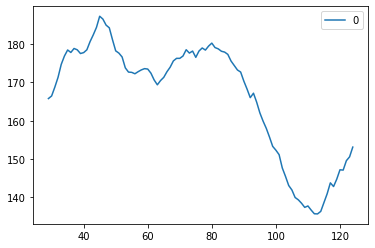

In [8]:
df.rolling(window=30).mean().plot(None, [1])

In [9]:
df.rolling(window=30).mean().sum()

Unnamed: 0    12864.000000
0             15963.226862
dtype: float64

<AxesSubplot:>

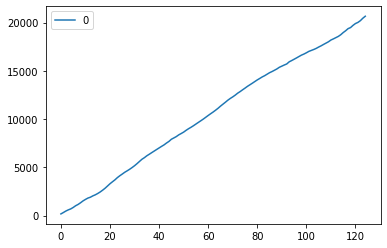

In [10]:
df.cumsum().plot(None, [1])

In [11]:
df

,Unnamed: 0,0
0,72.0,170.704970
1,73.0,143.748292
2,74.0,151.434029
3,75.0,123.815465
4,76.0,100.158551
...,...,...
120,192.0,189.639735
121,193.0,116.242869
122,194.0,181.214133
123,195.0,252.742860
